# Overview <a class=#objectives>

This notebook introduces you to Probability, Logistic Regression, and Classifiers. 

The topics that will be covered are:

*  <a href=#joint_marg_cond>Understand joint, marginal and conditional probabilities</a>
*  <a href=#sum_prod_rule>Sum and product rules</a>
*  <a href=#bayes_rule>Bayes rule</a>
*  <a href=#cond_idependence>Conditional Independence</a>
*  <a href=#mass_function>Probability mass function</a>
*  <a href=#density_function>Probability density function</a>
*  <a href=#log_regression>Understanding Logistic Regression</a>
*  <a href=#naive_bayes>Naive Bayes Classifier (optional)</a>

## Programming Tasks
For the programming tasks you will need to replace the following comment and exception with your own code:

```python
# YOUR CODE HERE
raise NotImplementedError()
```

Most programming tasks are followed by a cell with tests (using the `assert` keyword from python). You can consult these cells while developing your implementation and for validation. Note that there may be additional, hidden tests.

**<font size="3" color="red">Note</font>**: The `@contract` decorators make sure the data types and shapes are correct for the inputs and outputs. See [here](https://andreacensi.github.io/contracts/tour.html#quick-tour) for more. If you are more comfortable working without these, you can comment out the lines starting with `@contract`. However, in that case it can get tedious to locate the exact source of a bug.

## Deadline

All programming tasks need to be submitted before Monday 04/04/2022 17:00.
    
The tasks in <a href=#part_3 >Part 3</a> are optional and are not graded.


In [2]:
# DO NOT INSTALL THE LIBRARIES WHEN WORKING ON ifi-europa.uibk.ac.at

# Make sure that the required libraries are installed
# If you are using Google Colab, remember to upload the requirements file before 
# running this cell
# If you are running this notebook locally, the requirements file needs to be in 
# the same location as this notebook
import os
running_local = True if os.getenv('JUPYTERHUB_USER') is None else False
    
if running_local:
    import sys
    !{sys.executable} -m pip install -r requirements_week03.txt

In [3]:
# Import numpy and matplotlib
import numpy as np
from contracts import contract
import matplotlib.pyplot as plt

# From sklearn import ...
from sklearn.datasets import load_boston
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Counter for figures
figcount = 0

# Set the random seed for reproducing results
random_seed = 100
np.random.seed(random_seed)

# Part 1 - Probability Basics <a name='part_1' />

## [Understanding Joint, Marginal and Conditional Probability](#joint_marg_cond)


<img src=https://slideplayer.com/slide/13550085/82/images/12/Marginal%2C+Joint%2C+Conditional.jpg width="600">

<a href=#objectives> [go to top] </a>


In [5]:
@contract(throws='int,>0',
          coin_prob='array[2]',
          dice_prob='array[6]',
          returns='array[2x6]')
def calc_freq(throws, coin_prob, dice_prob):
    """
    Function that simulates a certain number (throws) of coin tosses and dice 
    throws and returns the frequencies of the discrete events
    
    :param throws: number of coin tosses and dice throws
    :param coin_prob: probability of head and tail after a coin toss
    :param dice_prob: probability of each face after a dice throws
    :returns: frequencies of the discrete events (numpy array of shape (3,2))
    """

    dice = np.random.choice(a=[1,2,3,4,5,6], size=throws, replace=True, p=dice_prob)
    coin = np.random.choice(a=[1,2], size=throws, replace=True, p=coin_prob)  # Heads=1, Tails=2

    # Initialize array for storing results
    frequencies = np.zeros((2,6))

    for i in range(throws):
        d = dice[i]
        c = coin[i]

        frequencies[c-1,d-1] += 1

    return frequencies

In [6]:
# Lets simulate coin tosses and dice throws to see what the frequencies look like

# Both the coin and dice are biased
c_prob_ = np.array([0.2,0.8])
d_prob_ = np.array([0.05, 0.15, 0.3, 0.3, 0.15, 0.05])
rand_freq = calc_freq(throws=10000, coin_prob=c_prob_, dice_prob=d_prob_)

# Print frequency table
print(rand_freq)

[[  82.  291.  593.  619.  280.   98.]
 [ 419. 1220. 2434. 2350. 1198.  416.]]


In [7]:
# Create a fixed frequency table for testing
f = np.array([[82., 291., 593., 619., 280., 98.], [419., 1220., 2434., 2350., 1198., 416.]])

### Implement functions to compute joint, marginal, and conditional probabilities


In [8]:
@contract(frequencies='array[2x6]',
          coin_face='int,>=1,<=2',
          dice_value='int,>=1,<=6',
          returns='float,>0.0,<=1.0')
def calc_discrete_joint_prob(frequencies, coin_face, dice_value):
    """
    Function to calculate the joint probability of the given coin face and dice
    value
    
    :param: frequencies: counts of the discrete events as a numpy array
    :param: coin_face: 1 for heads or 2 for tails
    :param: dice_value: can be any number from 1-6
    
    :returns: scalar number representing the joint probability 
              P(coin=coin_face, dice=dice_value)
    """
    return frequencies[coin_face-1][dice_value-1]/np.sum(frequencies)

In [9]:
assert np.allclose(calc_discrete_joint_prob(f, coin_face=2, dice_value=6), 0.0416)

In [10]:
@contract(frequencies='array[2x6]',
          variable='str',
          value='int,>=1,<=6',
          returns='float,>0.0,<=1.0')
def calc_discrete_marginal_prob(frequencies, variable, value):
    """
    Function to calculate the marginal probability P(variable=value)
    :param: frequencies: counts of the discrete events as a numpy array
    :param: variable: 'c' for coin or 'd' for dice
    :param: value: Value for the variable (1,2 for coin or 1-6 for dice)
    
    :returns: scalar probability
    
    """
    N = np.sum(frequencies)
    
    
    if variable=='c':  # coin
        S1 = np.sum(frequencies,1) #axis 1 = row
        i = value
        mp = S1[i-1]/N
                        
    else: # dice
        S2 = np.sum(frequencies,0) #0  =  col

        j = value
        mp =  S2[j-1]/N
        
    return mp
            


In [11]:
# Test marginal probabilities
assert np.allclose(calc_discrete_marginal_prob(f, variable='c', value=1), 0.1963)
assert np.allclose(calc_discrete_marginal_prob(f, variable='d', value=1), 0.0501)

In [12]:
@contract(frequencies='array[2x6]',
          coin_face='int,>=1,<=2',
          dice_value='int,>=1,<=6',
          returns='float,>0.0,<=1.0')
def calc_discrete_coin_cond_prob(frequencies, coin_face, dice_value):
    """
    Function to calculate the conditional probability P(coin=coin_face|dice=dice_value)
    :param: frequencies: counts of the discrete events as a numpy array
    :param: coin_face: 1 for heads or 2 for tails
    :param: dice_value: can be any number from 1-6
    
    :returns: scalar probability
    """
    S2 = np.sum(frequencies,0)
    c = coin_face-1
    d = dice_value-1
    cp1 = frequencies[c][d]/S2[d]

    return cp1



In [13]:
assert np.allclose(calc_discrete_coin_cond_prob(f, coin_face=2, dice_value=6), 0.8093385214007782)

In [14]:
@contract(frequencies='array[2x6]',
          coin_face='int,>=1,<=2',
          dice_value='int,>=1,<=6',
          returns='float,>0.0,<=1.0')
def calc_discrete_dice_cond_prob(frequencies, coin_face, dice_value):
    """
    Function to calculate the conditional probability P(dice=dice_value|coin=coin_face)
    :param: frequencies: counts of the discrete events as a numpy array
    :param: coin_face: 1 for heads or 2 for tails
    :param: dice_value: can be any number from 1-6
    
    :returns: scalar probability
    """

    S1 = np.sum(frequencies,1)
    c = coin_face-1
    d = dice_value-1
    cp2 = frequencies[c][d]/S1[c]
  
    return cp2


In [15]:
assert np.allclose(calc_discrete_dice_cond_prob(f, coin_face=2, dice_value=6), 0.05176060719173821)

## [Sum and Product Rule](#sum_prod_rule)

Sum rule: $p(X) = \sum\limits_{Y}p(X,Y)$

Product rule: $p(X,Y) = p(Y|X)p(X)$


Use the functions that you wrote to verify the sum and the product rules.

<a href=#objectives> [go to top] </a>

Verify the sum rule for $p(d=5)$.

In [16]:
# Verify the sum rule
# X is dice, Y is coin

# p(X)
assert(np.allclose(calc_discrete_marginal_prob(f, variable='d', value=5), 0.1478))

# sum_Y p(X,Y)
cumulative = 0
for c in [1,2]:
    cumulative += calc_discrete_joint_prob(f, coin_face=c, dice_value=5)
    

assert(np.allclose(cumulative, 0.14780000000000001))

Verify the product rule for $p(c=2,d=5)$.

In [17]:
# Verify the product rule
# X is dice, Y is coin

# p(X,Y)
assert(np.allclose(calc_discrete_joint_prob(f, coin_face=2, dice_value=5), 0.1198))

# p(Y|X)*p(X)
prod_rule = calc_discrete_coin_cond_prob(f, coin_face=2, dice_value=5)*calc_discrete_marginal_prob(f, variable='d', value=5)

assert(np.allclose(prod_rule, 0.11979999999999998))

## [Bayes Rule](#bayes_rule)

Bayes rule is stated as

$$
\begin{align}
p(Y|X) = \frac{p(X|Y)p(Y)}{p(X)} &= \frac{p(X|Y)p(Y)}{\sum\limits_{Y}p(X|Y)p(Y)} \text{ (for the discrete case)} 
\end{align}
$$

Proof:
$$
\begin{align}
&p(X,Y) = p(Y,X) \\
&\Rightarrow p(Y|X)p(X) = p(X|Y)p(Y) \text{ (from the product rule)}\\ 
&\Rightarrow p(Y|X) = \frac{p(X|Y)p(Y)}{p(X)}\\
&\Rightarrow p(Y|X) = \frac{p(X|Y)p(Y)}{\sum\limits_{Y}p(X,Y)} \text{ (from the sum rule)}\\
&\Rightarrow p(Y|X) = \frac{p(X|Y)p(Y)}{\sum\limits_{Y}p(X \vert Y)p(Y)} \text{ (from the product rule)}
\end{align}
$$

<a href=#objectives> [go to top] </a>

In [18]:
# Verify Bayes' rule
# X is dice, Y is coin

coin_face = 1
dice_value = 3

# Calculate p(Y|X)
p_y_given_x = calc_discrete_coin_cond_prob(f, coin_face=coin_face, dice_value=dice_value)
assert(np.allclose(p_y_given_x, 0.19590353485298975))

# Calculate p(X|Y), p(Y) and p(X)
p_x_given_y = calc_discrete_dice_cond_prob(f, coin_face=coin_face, dice_value=dice_value)
p_y = calc_discrete_marginal_prob(f, variable='c', value=coin_face)
p_x = calc_discrete_marginal_prob(f, variable='d', value=dice_value)
assert(np.allclose(p_x_given_y*p_y/p_x, 0.19590353485298972))


## [Conditional Independence](#cond_idependence)

$Y$ is conditionally independent of $X$ if $p(Y \vert X) = p(Y)$. Intuitively, $Y$ is independent of $X$ if knowing about $X$ gives no extra information about $Y$.

<a href=#objectives> [go to top] </a>

In [19]:
# X is dice, Y is coin
dice_value = 3
coin_face = 1

# Is p(Y|X) = p(Y)
p_y_given_x = calc_discrete_coin_cond_prob(f, coin_face=coin_face, dice_value=dice_value)
assert(np.allclose(p_y_given_x, 0.19590353485298975))

p_y = calc_discrete_marginal_prob(f, variable='c', value=coin_face)
assert(np.allclose(p_y, 0.1963))

In [20]:
# Coin face is completely dependent on the dice throw
@contract(throws='int,>0',
          dice_prob='array[6]',
          returns='array[2x6]')
def calc_freq2(throws, dice_prob):
    """
    Function that simulates a certain number (throws) of coin tosses and dice 
    throws and returns the frequencies of the discrete events.
    
    :param throws: number of coin tosses and dice throws
    :param dice_prob: probability of each face after a dice throws
    
    :returns: scalar probability
    """

    dice = np.random.choice(a=[1,2,3,4,5,6], size=throws, replace=True, p=dice_prob)
    coin = dice%2 + 1  # Coin is 1 if dice value is even, else it is 2

    # Initialize array for storing results
    frequencies = np.zeros((2,6))

    for i in range(throws):
        d = dice[i]
        c = coin[i]

        frequencies[c-1,d-1] += 1

    return frequencies

In [21]:
# Tests
coin_face = 1
dice_value = 4

# Lets simulate coin tosses and dice throws for a variety of conditions
# and see what the frequencies look like
f_dependent = calc_freq2(throws=10000, dice_prob=np.array([0.05, 0.15, 0.3, 0.3, 0.15, 0.05]))

# Calculate p(Y|X)
p_y_given_x_dependent = calc_discrete_coin_cond_prob(f_dependent, coin_face=coin_face, dice_value=dice_value)

# p(Y)
p_y_dependent = calc_discrete_marginal_prob(f_dependent, variable='c', value=coin_face)


# Is p(Y|X) = p(Y)
print(p_y_given_x_dependent)
print(p_y_dependent)

1.0
0.4984


## [Probability Mass Function](#mass_function)

A probability mass function (PMF) is a function that gives the probability that a discrete random variable is exactly equal to some value.

<a href=#objectives> [go to top] </a>

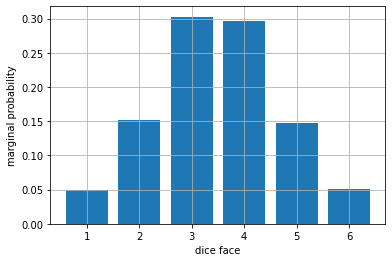

In [22]:
dice_values = [1,2,3,4,5,6]
dice_marginal_probabilities = [calc_discrete_marginal_prob(f, 'd', v) for v in dice_values]
plt.grid()
plt.bar(dice_values,dice_marginal_probabilities);
plt.xlabel('dice face');
plt.ylabel('marginal probability');

## [Probability Density Function](#density_function)

A continous probability density function (PDF) must satisfy the following condition:

$$
\int\limits_{-\infty}^{\infty}p(x)\mathrm{d}x = 1
$$

In this example the PDF is defined by the Normal distribution

$$
p(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp{\Big(-\frac{(x-\mu)^2}{2\sigma^2}\Big)}
$$

where $\mu$ is the mean and $\sigma^2$ is the variance

<a href=#objectives> [go to top] </a>

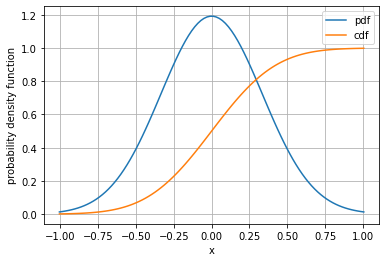

In [23]:
# Plotting a probability density function and a cumulative density function

import scipy.stats as stats
import math

mu = 0
variance = 0.112 # For low variance the PDF gets 'peaky'
sigma = math.sqrt(variance)

x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
pdf = stats.norm.pdf(x, mu, sigma)
cdf = stats.norm.cdf(x, mu, sigma)
plt.plot(x, pdf, label='pdf')
plt.plot(x, cdf, label='cdf')
plt.xlabel('x')
plt.ylabel('probability density function')
plt.legend()
plt.grid()
plt.show()

To verify your understanding, consider the following questions about the plot shown above:


1.   What is the probability of $x$ having the exact value of 0.0?
2.   What is the probability of $x$ being in the range $-0.0005 \leq x \leq 0.0005$?
3.   What is the probability of $x$ being less than 0.25?



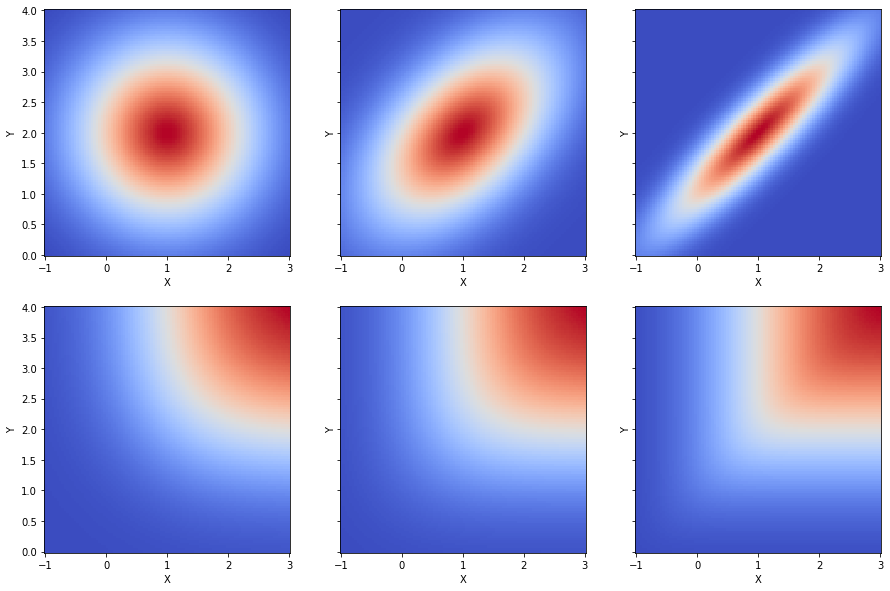

In [24]:
# Plotting a probability density function for 2 variables

from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from matplotlib import cm

x = np.linspace(-1, 3, 100)
y = np.linspace(0, 4, 100)

X, Y = np.meshgrid(x, y)

pos = np.dstack((X, Y))
mu = np.array([1, 2])
cov1 = np.array([[1.0, 0.0],[0.0, 1.0]])  # X,Y are independent
cov2 = np.array([[1.0, .5],[.5, 1.0]])  # Dependent
cov3 = np.array([[1.0, 0.9],[0.9, 1.0]])  # Highly dependent

rv1 = multivariate_normal(mu, cov1)
rv2 = multivariate_normal(mu, cov2)
rv3 = multivariate_normal(mu, cov3)

# Probability densities
Z1 = rv1.pdf(pos)
Z2 = rv2.pdf(pos)
Z3 = rv3.pdf(pos)

# Cumulative probabilities
C1 = rv1.cdf(pos)
C2 = rv2.cdf(pos)
C3 = rv3.cdf(pos)

fig, ax = plt.subplots(2, 3, sharex=False, sharey=True, figsize=(15,10))

ax[0][0].pcolormesh(X, Y, Z1, cmap=cm.coolwarm)
ax[0][1].pcolormesh(X, Y, Z2, cmap=cm.coolwarm)
ax[0][2].pcolormesh(X, Y, Z3, cmap=cm.coolwarm)

ax[1][0].pcolormesh(X, Y, C1, cmap=cm.coolwarm)
ax[1][1].pcolormesh(X, Y, C2, cmap=cm.coolwarm)
ax[1][2].pcolormesh(X, Y, C3, cmap=cm.coolwarm)

for i in range(2):
    for j in range(3):
        ax[i][j].set_xlabel('X')
        ax[i][j].set_ylabel('Y')

# [Part 2 - Logistic Regression](#part_2)



<span style="font-size:1.5em;">**Binary logistic regression - Assumptions**</span>

*    In a binary logistic regression model, the dependent variable has two levels: 0 and 1 (the dependent variable is binary). Level 1 of the dependent variable represents the desired outcome. 

*    Only the meaningful variables should be included.

*    The independent variables should be independent of each other.

*    The independent variables are linearly related to the odds, where
$\text{odds}(x) = \text{ln} \frac{p(x)}{1-p(x)}$.

*    In general, logistic regression requires quite large sample sizes.

<span style="font-size:1.5em;">**Logistic regression on a real dataset**</span>

 We will use the Boston housing dataset. The Boston housing dataset was collected in $1978$ and each of the $506$ entries represent aggregated data about $14$ features for homes from various suburbs in Boston, Massachusetts.

There are 14 attributes in each case of the dataset. They are:

1. CRIM - per capita crime rate by town 
2. ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS - proportion of non-retail business acres per town.
4. CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
5. NOX - nitric oxides concentration (parts per 10 million)
6. RM - average number of rooms among homes in the neighborhood
7. AGE - proportion of owner-occupied units built prior to $1940$
8. DIS - weighted distances to five Boston employment centres
9. RAD - index of accessibility to radial highways
10. TAX - full-value property-tax rate per \$ $10.000$
11. PTRATIO - pupil-teacher ratio by town
12. B - $1000(B_k - 0.63)^2$ where $B_k$ is the proportion of blacks by town
13. LSTAT - \% lower status of the population
14. MEDV - Median value of owner-occupied homes in \$ $1000$'s 

Only $2$ features are used in this exercise in order to visualize the data and the decision boundary in a 2D plot. The features 'RM' and 'CRIM' are most discriminative and were chosen as the input features of our regression model. The 'MEDV' feature is the continuous ```'target'``` or observed output. 

<a href=#objectives> [go to top] </a>

## Load, split, and visualize the data

X_train.shape: (354, 2)
Y_train.shape: (354,)
X_test.shape: (152, 2)
Y_test.shape: (152,)


/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

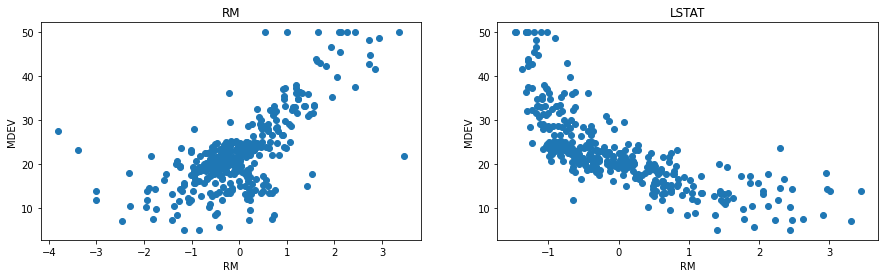

In [25]:
# Load the Boston dataset (which is a python dictionary)
boston_dataset = load_boston()

# Fetch the desired columns and process the data
Y = boston_dataset['target']

# Select the 'RM' and 'LSTAT' columns from the dataset
used_features = ['RM', 'LSTAT']
data_col = list()
for col, val in enumerate(boston_dataset['feature_names']):
    if(val in used_features):
        data_col.append(col)

X = boston_dataset['data'][:,data_col]

# Split into train and test sets
random_seed = 100 # Use an integer to have repeatable results
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=random_seed)

# Center and normalize the train data to have 0 mean and 1 standard deviation
scaler  = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

# Scale the test data in the same way as the train data
X_test = scaler.transform(X_test) 

# Printing shape of data
print('X_train.shape: {}'.format(X_train.shape))
print('Y_train.shape: {}'.format(Y_train.shape))
print('X_test.shape: {}'.format(X_test.shape))
print('Y_test.shape: {}'.format(Y_test.shape))

# Visualize each feature dimension in the training set
plt.figure(figsize=(15, 4))
for i in range(X_train.shape[1]):
    plt.subplot(1, X_train.shape[1], i+1)
    plt.plot(X_train[:,i], Y_train, 'o');
    plt.title(used_features[i]);
    plt.xlabel(used_features[0])
    plt.ylabel('MDEV')

## Make the observations binary 

* Use \$ $20K$ as threshold
* Visualize the data using a 2D plot

In [26]:
def plot_data(x, y, x_label = 'RM', y_label = 'LSTAT', high_label='>20', low_label='<20'):
    """
    Function that plots a figure where the axes are 'RM' and 'LSTAT'.
    """

    # Separating positive and negative scores (in this case 1 and 0 values):
    pos = y == 1
    neg = y == 0
    
    # Scatter plotting the data, filtering them according the pos/neg values
    plt.scatter(x[pos, 0], x[pos, 1], s=30, c='darkgreen', marker='+', label=high_label)
    plt.scatter(x[neg, 0], x[neg, 1], s=30, c='red', marker='o', label=low_label)

    # Labels and limits
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.xlim(x[:, 0].min(), x[:, 0].max())
    plt.ylim(x[:, 1].min(), x[:, 1].max())

    # Legend
    pst = plt.legend(loc='upper right', frameon=True)
    pst.get_frame().set_edgecolor('k')

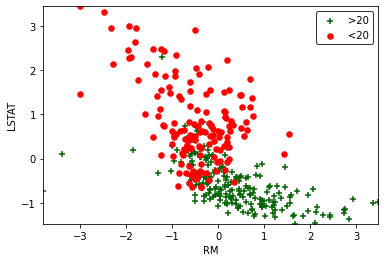

In [27]:
mdev_threshold = 20.

Y_train_bin = np.copy(Y_train)
Y_train_bin[Y_train > mdev_threshold] = 1
Y_train_bin[Y_train <= mdev_threshold] = 0

Y_test_bin = np.copy(Y_test)
Y_test_bin[Y_test > mdev_threshold] = 1
Y_test_bin[Y_test <= mdev_threshold] = 0

plot_data(X_train, Y_train_bin, x_label = used_features[0], y_label = used_features[1])

## Define the sigmoid function

The logistic regression model is defined as

$$f(\mathbf{x}) = \sigma(\mathbf{w}^{\mathsf{T}}\mathbf{x})$$

where $\sigma(\cdot)$ is the sigmoid function defined as $\sigma(z) = \frac{1}{1+e^{-z}}$. 

### Implement the sigmoid function.

In [28]:
@contract(z='array[N]',
          returns='array[N]')
def sigmoid(z):
    """
    Function that computes the sigmoid of the input values.
    
    :param z: input values
    :returns: sigmoid values for each input value
    """
    #use numpy func 
    Sig = []
    
    for i in range(len(z)):
        Sig.append(1/(1+np.exp(-1* z[i])))# empty array elements cannot be assigned 
        print(Sig)
    return np.array(Sig) #have to return in np array!
    

In [29]:
assert np.allclose(sigmoid(np.array([1])), 0.7310585786300049)

[0.7310585786300049]


 ### Plot the sigmoid function graph between $[-10,\,10]$

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



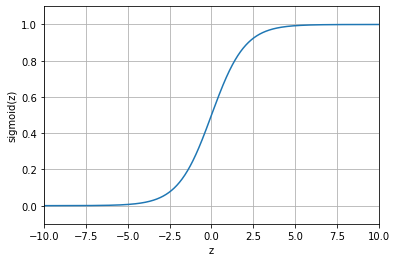

In [30]:
# Plot the sigmoid's graph

# Compute the sigmoid in the interval [-10,10] 
z_val = np.linspace(-10, 10, 1000)

# Plot
plt.plot(z_val, sigmoid(z_val))
plt.grid(True)

# Labels and limits
plt.xlabel('z')
plt.ylabel('sigmoid(z)')
plt.xlim(z_val.min(), z_val.max())
plt.ylim(-0.1, 1.1);

## Define the loss function and derive its gradient

To estimate the parameters of binary logistic regression, you need to maximize the likelihood:

$$L(\mathbf{w}) = \prod_{i=1}^{n}\sigma(\mathbf{w}^{\mathsf{T}}\mathbf{x}_i)^{y_i}\{1-\sigma(\mathbf{w}^{\mathsf{T}}\mathbf{x}_i)\}^{1-y_i}$$

Which is equivalent to minimizing the negative (log) likelihood, minimizing loss:

$$J(\mathbf{w}) = -ln(L(\mathbf{w})) = - \sum_{i=1}^{n}\{y_i ln(\sigma(\mathbf{w}^{\mathsf{T}}\mathbf{x}_i)) + (1-y_i)ln(1-\sigma(\mathbf{w}^{\mathsf{T}}\mathbf{x}_i))\}$$


From which you can derive the gradient:

$$\nabla J(\mathbf{w}) = \sum_{i=1}^{n}(\sigma(\mathbf{w}^{\mathsf{T}}\mathbf{x}_i)-y_i)\mathbf{x}_i$$

In [31]:
@contract(w='array[3]',
          x='array[Nx3]',
          y='array[N]',
          returns='float,>=0.0')
def loss_function(w, x, y):
    """
    Function that computes the empirical loss for a logistic regression model.
    
    :param w: weights
    :param x: input data
    :param y: labels
    :returns: computed loss
    """
    
    # A small value used to avoid divisions by zero
    eps = 1e-15
    
    # Number of training examples
    #N = y.shape[0]
    
    f_x = sigmoid(np.dot(x, w))
    
    J = - (np.dot(y, np.log(f_x)) + np.dot((1 - y), np.log(1 - f_x + eps))) 
    

    return J

In [32]:
# Augment input marrix with a column of ones
if X_test.shape[1]==2:
    X_test = np.hstack((np.ones((X_test.shape[0],1)), X_test))
    X_train = np.hstack((np.ones((X_train.shape[0],1)), X_train))

# Initial weights
w = np.zeros(X_test.shape[1])

# Test loss and gradient functions
assert np.allclose(loss_function(w, X_test, Y_test), 105.35837144511743)

[0.5]
[0.5, 0.5]
[0.5, 0.5, 0.5]
[0.5, 0.5, 0.5, 0.5]
[0.5, 0.5, 0.5, 0.5, 0.5]
[0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 

In [33]:
@contract(w='array[3]',
          x='array[Nx3]',
          y='array[N]',
          returns='array[3]')
def loss_function_gradient(w, x, y):
    """
    Function that computes the empirical loss for a logistic regression model.
    
    :param w: Weights vector
    :param x: Training input data
    :param y: Training target labels
    :returns: gradient of the loss
    """
    wT = np.transpose(w)
    gradient = (sigmoid(wT@x)-y)@x
    
    
    return gradient

In [45]:
assert np.allclose(loss_function_gradient(w, X_test, Y_test_bin),
                   [-8., -33.45185965, 48.15859379])

[0. 0. 0.]


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 152 is different from 3)

## Calculate the logistic regression parameters using the BGD algorithm

Update rule:
$$w(j+1) := w(j) - \alpha \sum^{n}_{i=1} (\sigma(\mathbf{w}^{\mathsf{T}}\mathbf{x}_i)-y_i)x_{ij}$$

Initialize the weights to zero to get reproducible results. 

An alternative can be to sample the weights from a Gaussian distribution $\mathcal{N}(0,1)$.

In [37]:
@contract(x='array[Nx3]',
          y='array[N]',
          alpha='float,>0.0',
          num_steps='int,>0',
          returns='tuple(array[3], list)')
def batch_gradient_descent(x, y, alpha = 0.0001, num_steps = 20000):
    """
    Implementation of the gradient descent algorithm for logistic regression
    
    :param: x: Training input data
    :param: y: Training target labels
    :param: alpha: Scalar learning rate
    :param: num_steps: Number of gradient descent steps
    :returns: weight vector 'w' and list of 'losses' (loss in each step)
    """
    
    # Initialize the weights to zero
    w = np.zeros((x.shape[1]))
    w+=alpha*loss_function_gradient(x,y,z)

    return w, losses

In [38]:
w_star, losses = batch_gradient_descent(X_train, Y_train_bin)
print(w_star)
assert np.allclose(w_star,
                   [0.32053651, 0.27962065, -2.91156613])

NameError: name 'z' is not defined

### Plot the loss at each training step

Let's plot the losses in a graph where the x-axis shows the $\log_{10}$ of the step number and the y-axis shows the training loss.

In [ ]:
steps = np.arange(1.0, len(losses)+1,1)
plt.plot(np.log10(steps),losses)
plt.xlabel('$\log_{10}(steps)$')
plt.ylabel('Squared loss')
plt.grid()

## Evaluate the logistic regression model

After calculating the parameters, we can use the model to make predictions:
1. Calculate and plot the decision boundary
2. Evaluate the accuracy on training and test sets
3. Predict the outcome (MDEV smaller or bigger than 20) for ```(3, 0.5)``` 

In [ ]:
@contract(w='array[3]',
          x='array[Nx3]',
          returns='array[N]')
def predict(w, x):
    """
    Assign input to a class using the logistic regression model.
    
    :param: w: Weight vector
    :param: x: Test input data
    :returns: Predicted class labels (0 or 1)
    """

    f_x = sigmoid(np.dot(x, w))
    
    predictions = list()
    for h in f_x:
        if (h > 0.5):
            predictions.append(1)
        else:
            predictions.append(0)
    
    return np.array(predictions)

In [ ]:
# Calculating x and y for the decision boundary
plot_x = np.array([np.min(X_train[:, 1])-1, np.max(X_train[:, 1])+1])

# From the decision boundary calculations x2 = (-1 / w2) * (w1 * x1 + w0)
plot_y = (-1 / w_star[2]) * (w_star[1] * plot_x + w_star[0])
#plt.scatter(45, 85, s=30, c='r', marker='x', label='Ex.1 - 45, Ex.2 - 85')

# Plotting the data
plot_data(X_train[:,1:], Y_train_bin, x_label = used_features[0], y_label = used_features[1])
plt.plot(plot_x, plot_y, c='b');

# Training accuracy
# Prediction using calculated values of w and given data set
p = predict(w_star, X_train)
print('Training Accuracy of the classifier: {0}%'.format(np.sum(p==Y_train_bin) / p.size * 100))

# Testing accuracy
# Prediction using calculated values of w and given data set
p = predict(w_star, X_test)
print('Testing Accuracy of the classifier: {0}%'.format(np.sum(p==Y_test_bin) / p.size * 100))

# Your code ends here
p = predict(w_star, np.array([[1,3,0.5]]))
print('Predicition at (3,0.5): {0}'.format('<20' if p==0 else '>20'))

# [Part 3 (optional) - Naive Bayes Classifier](#part_3)

**Naive Bayes** is a classification algorithm for binary (two-class) and multiclass classification problems. It is called Naive Bayes because the calculations of the probabilities for each class are simplified to make their calculations tractable.

Rather than attempting to calculate the probabilities of each attribute value, they are assumed to be conditionally independent given the class value.

This is a very strong assumption that is most unlikely in real data, i.e. that the attributes do not interact. Nevertheless, the approach performs surprisingly well on data where this assumption does not hold.

More in details, the standard **Bayes classifier** tries to extimate

$$
\begin{align}
p(Y|X) = \frac{p(X,Y)}{p(X)} 
\end{align}
$$

using maximum likelihood estimation.

The **Naive Bayes classifier** exploits the Bayes rule and the conditional independendence ('naive') assumption.

$$
\begin{align}
p(Y|X) = \frac{p(X,Y)}{p(X)} = \frac{p(X|Y)p(Y)}{p(X)} \text{ (Bayes rule)} 
\end{align}
$$

Estimating $p(Y)$ is easy in a discrete case. Estimating $p(X|Y)$ for $X=\{x_1,x_2,\ldots,x_m\}$ requires the naive assumption:

$$
\begin{align}
p(X|Y) &= p(x_1|Y)p(x_2|Y,x_1)p(x_3|Y,x_1,x_2) \cdots p(x_m|Y,x_1,x_2,\ldots,x_{m-1} ) &\text{chain rule of probability}\\ 
& = p(x_1|Y)p(x_2|Y)\cdots p(x_m|Y) &\text{conditional independence (naive)}\\
& = \prod_{i=1}^m p(x_i|Y)
\end{align}
$$

As for the **Bayes classifier**, the **Naive Bayes classifier** predicts the class for which the posterior probability is the greatest:

$$
\begin{align}
g(X) &= \text{argmax}_Y p(Y|X) \\ 
& = \text{argmax}_Y \frac{p(X|Y)p(Y)}{p(X)}\\
& = \text{argmax}_Y p(X|Y)p(Y) &p(X) \text{ does not depend on } Y\\
& = \text{argmax}_Y \prod_{i=1}^m p(x_i|Y)p(Y) &\text{Naive assumption}\\
& = \text{argmax}_Y \sum_{i=1}^m \log{p(x_i|Y)} + \log{p(Y)} &\text{Log is monotonic, numerically stable}
\end{align}
$$

We assume that $p(x_i|Y = c) \sim ~\mathcal{N}(\mu_{ic},\sigma_{ic}^2)$ and estimate the parameters from training data.

**Naive Bayes classifier on a real dataset**

We will use the 'iris' dataset. There are 5 attributes in each case of the dataset. They are:

1. Sepal length in cm
2. Sepal width in cm
3. Petal length in cm
4. Petal width in cm
5. Class (```target```): Iris Setosa, Iris Versicolour, and Iris Virginica

Only $2$ features are used in this exercise in order to visualize the data and the decision boundary in a 2D plot. The features 'Sepal length in cm' and 'Petal length in cm' are chosen as the input features of our regression model. The 'Class' feature is the continuous ```'target'``` or observed output. 

<a href=#objectives> [go to top] </a>

## Load, split, and visualize  the data

In [ ]:
def plot_iris_dataset(X, Y, x_label = 'sepal length (cm)', y_label = 'sepal width (cm)'):
    '''
    A function to visualize the IRIS dataset.
    '''
    # Split the 3 classes
    setosa_indx = Y == 0
    versicolour_indx = Y == 1
    virginica_indx = Y == 2

    # Scatter plotting the data, filtering them according the pos/neg values
    plt.scatter(X[setosa_indx, 0], X[setosa_indx, 1], s=30, c='darkgreen', marker='o', label='setosa')
    plt.scatter(X[versicolour_indx, 0], X[versicolour_indx, 1], s=30, c='red', marker='o', label='versicolour')
    plt.scatter(X[virginica_indx, 0], X[virginica_indx, 1], s=30, c='darkblue', marker='o', label='virginica')

    # Labels and limits
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.xlim(X[:, 0].min()-0.1, X[:, 0].max()+0.1)
    plt.ylim(X[:, 1].min()-0.1, X[:, 1].max()+0.1)

    # Legend
    pst = plt.legend(loc='lower right', frameon=True)
    pst.get_frame().set_edgecolor('k')
    
    return plt

In [ ]:
# Load the Iris dataset (which is a python dictionary)
iris_dataset = load_iris()

# Fetch the desired columns and process the data
Y = iris_dataset['target']

# Select the 'RM' and 'LSTAT' columns from the dataset
used_features = ['sepal length (cm)', 'petal length (cm)']
data_col = list()
for col, val in enumerate(iris_dataset['feature_names']):
    if(val in used_features):
        data_col.append(col)

X = iris_dataset['data'][:,data_col]

# Split into train and test sets
random_seed = np.random
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=random_seed)

# Printing shape of data
print('X_train.shape: {}'.format(X_train.shape))
print('Y_train.shape: {}'.format(Y_train.shape))
print('X_test.shape: {}'.format(X_test.shape))
print('Y_test.shape: {}'.format(Y_test.shape))

# Plot the data
plot_iris_dataset(X, Y, x_label=used_features[0], y_label=used_features[1]);

## Estimate the parameters of the Naive Bayes classifier

We assume that $p(x_i|Y = c) \sim ~\mathcal{N}(x_i|\mu_{ic},\sigma_{ic}^2)$ and estimate the parameters from training data.

In our exercise we have:

* $3$ class labels: Setosa, Versicolor, Virginica which we label as $Y \in \{0,1,2\}$
* $2$ features: $x_1$ - sepal length and $x_2$ petal length 

For each feature, we calculate the estimated class mean, class variance and prior probability:

 * Mean: $\mu_{x_1|y=0}$, $\mu_{x_1|y=1}$, $\mu_{x_1|y=2}$, $\mu_{x_2|y=0}$, $\mu_{x_2|y=1}$, $\mu_{x_2|y=2}$
 * Variance: $\sigma^2_{x_1|y=0}$, $\sigma^2_{x_1|y=1}$, $\sigma^2_{x_1|y=2}$, $\sigma^2_{x_2|y=0}$, $v_{x_2|y=1}$, $\sigma^2_{x_2|y=2}$
 * Prior: $p(y=0)$, $p(y=1)$, $p(y=2)$
 
For a query point $(x_1,x_2)$, we make decisions by computing:

$$
\begin{align}
g(X) & = \text{argmax}_Y \prod_{i=1}^2 p(x_i|Y)p(Y) \\
& = \text{argmax}_Y \{p(x_1|Y)p(Y)\cdot p(x_2|Y)p(Y)\}\\
& = \text{argmax}_Y \mathcal{N}(x_1|\mu_{x_1|Y},\sigma^2_{x_1|Y})p(Y)\cdot \mathcal{N}(x_2|\mu_{x_2|Y},\sigma^2_{x_2|Y})p(Y)
\end{align}
$$

The calculation is repeated for each class and query point is assigned to the class with highest value.

Write a function that predicts the class of a query point using the Gaussian Naive Bayes classifier.

In [ ]:
# Import the normal distribution
from scipy.stats import norm

@contract(X='array[Nx1]',
          mu='array[Dx2]',
          std='array[Dx2]',
          pi='array[D]',
          returns='int')
def predict_NB_gaussian_class(X, mu, std, pi): 
    """
    Predicts the class of the input data using the Gaussian Naive Bayes classifier .
    
    :param: X: Test input data
    :param: mu: Mean vector for each class
    :param: std: Variance vector for each class
    :param: pi: Prior for each class
    :returns: Predicted class labels
    """
    
    # YOUR CODE HERE (please remove 'raise NotImplementedError()')
    raise NotImplementedError()

In [ ]:
#Estimating the parameters 
setosa_indx = Y_train == 0
versicolour_indx = Y_train == 1
virginica_indx = Y_train == 2
specied_indx = [setosa_indx, versicolour_indx, virginica_indx]
mu_list = list()
std_list = list()

for val in specied_indx:
    mu_list.append(np.mean(X_train[val, :], axis=0))
    std_list.append(np.std(X_train[val, :], axis=0))

N = X_train.shape[0]
prior_list = [X_train[setosa_indx, :].shape[0] / N, X_train[versicolour_indx, :].shape[0] / N, X_train[virginica_indx, :].shape[0] / N]    

# Create a 2-D mesh grid of points
num_points = 100
x_mesh = np.linspace(4, 8, num_points)
y_mesh = np.linspace(0.5, 7.5, num_points)
x_mesh, y_mesh = np.meshgrid(x_mesh, y_mesh)

# Computing the predicted class function for each value on the grid
mu = np.array(mu_list)
std = np.array(std_list)
prior = np.array(prior_list)
Z = np.array(  [predict_NB_gaussian_class( np.array([xx,yy]).reshape(-1,1), mu, std, prior) 
                     for xx, yy in zip(np.ravel(x_mesh), np.ravel(y_mesh)) ] )


# Reshaping the predicted class into the meshgrid shape
z_mesh = Z.reshape(x_mesh.shape)

#Plot the filled and boundary contours
plt = plot_iris_dataset(X, Y);

plt.contourf( x_mesh, y_mesh, z_mesh, 2, alpha = .1, colors = ('green','red', 'blue'))
plt.contour( x_mesh, y_mesh, z_mesh, 2, alpha = 1, colors = ('green','red', 'blue'))

# Addd axis and title
plt.title('Gaussian Naive Bayes decision boundaries');

## Compute the accuracy of the Naive Bayes classifier on train and test sets

In [ ]:
y_pred = np.array(  [predict_NB_gaussian_class( np.array([xx,yy]).reshape(-1,1), mu, std, prior) 
                     for xx, yy in zip(np.ravel(X_train[:,0]), np.ravel(X_train[:,1])) ] )
print('Training Accuracy of the classifier: {0}%'.format(np.sum(y_pred==Y_train) / y_pred.shape[0] * 100))

y_pred = np.array(  [predict_NB_gaussian_class( np.array([xx,yy]).reshape(-1,1), mu, std, prior) 
                     for xx, yy in zip(np.ravel(X_test[:,0]), np.ravel(X_test[:,1])) ] )
print('Testing Accuracy of the classifier: {0}%'.format(np.sum(y_pred==Y_test) / y_pred.shape[0] * 100))